In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc



In [12]:
N = 100
tmax = 10
D = 1
def potential(x):
    return x ** 4 / 4 - x ** 2 / 2

def dpotential(x):
    return x ** 3 - x

def action(init_values, q0, qf):
        """function to calculate the stochastic action using the Ito formalism

        Args:
            dt (float): time step width
            q (np.ndarray): position
            k1 (np.ndarray): conjugate variable to q

        Returns:
            float: (discrete) MSR action of system
        """
        q = init_values[:N]
        #k1 = init_values[N:]
        
        q[0] = q0
        q[-1] = qf
        
        dt = tmax / N

        # dimension
        m = len(q) - 1

        # derivatives
        qdot = np.zeros(m)

        qdot[:] = (q[1:] - q[:-1]) / dt

        # action
        S = 0
        
        for i in range(m):
            S += (qdot[i] + dpotential(q[i])) ** 2 / 2
        # (
        #     D**(-1) * np.dot(qdot + misc.derivative(potential, q[:-1]), qdot + misc.derivative(potential, q[:-1]))
        #     #- lambda_ * np.dot(np.ones(m), phi(k1[:-1] * a))
        # )

        # return the action
        return S * dt

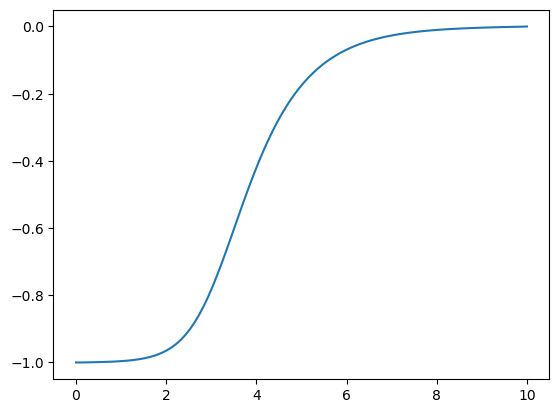

In [16]:

q0 = -1
qf = 0
system = np.linspace(q0, qf, N)
optimum = opt.minimize(action, x0=system, args=(q0, qf))#, constraints=constraint, options={'disp': True})


time = np.linspace(0, tmax, N)
q = np.zeros(N)
q[0] = -1
q[-1] = 0
q[1:-1] = optimum.x[:N-2]


plt.plot(time, q)

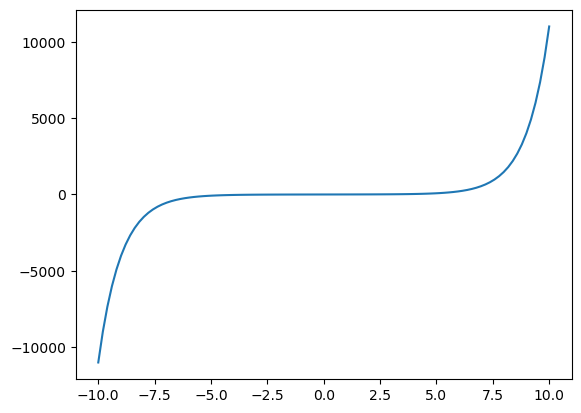

In [8]:
o = 10
k = np.linspace(-o, o, 100)

plt.plot(k, np.sinh(k) + k)
#plt.yscale("log")



In [9]:
print(np.sinh(100))

1.3440585709080678e+43


[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]


(0.01, 1.0, -1.0, 1.0)

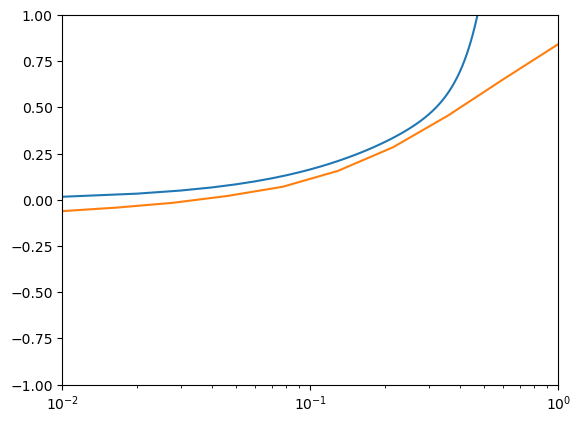

In [5]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred)/(8/27 * t * AP_pred))
plt.plot(tau, (S5 - AP_pred)/(8/27 * tau * AP_pred))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])

(0.01, 1.0, 0.249, 0.26)

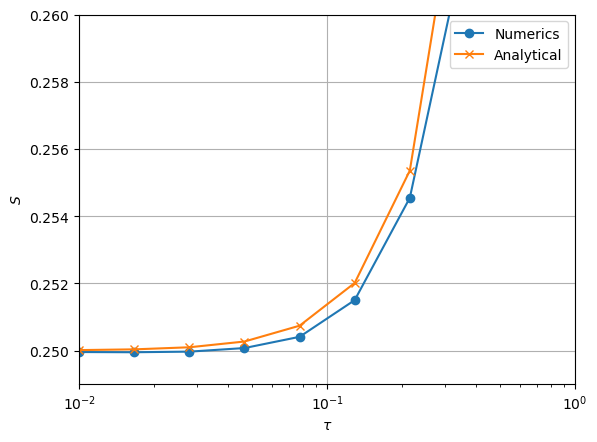

In [14]:
plt.plot(tau, S5, "-o",label="Numerics")
plt.plot(tau, g(tau), "-x", label="Analytical")
plt.xscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S$")
plt.legend()
plt.axis([1e-2, 1e0, 0.249, 0.26])

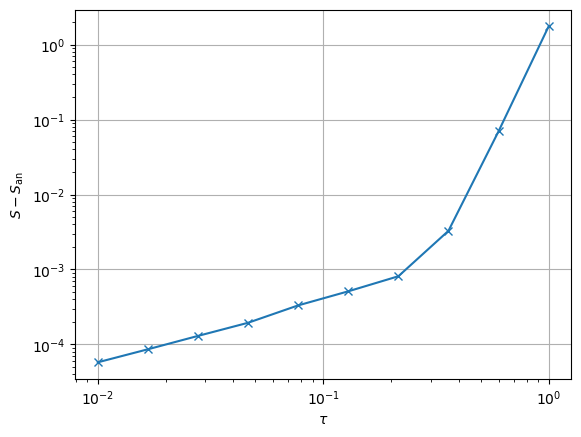

In [9]:
plt.plot(tau, g(tau)-S5, "-x")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S-S_\mathrm{an}$")
plt.show()

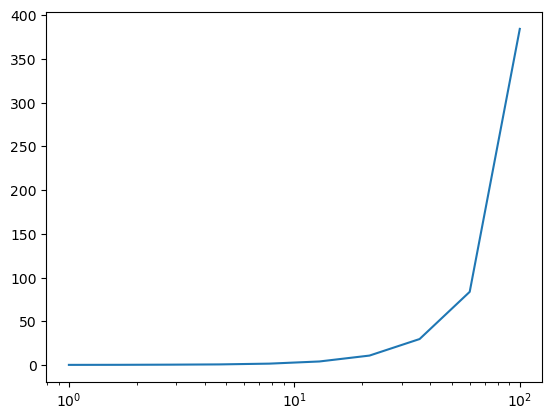

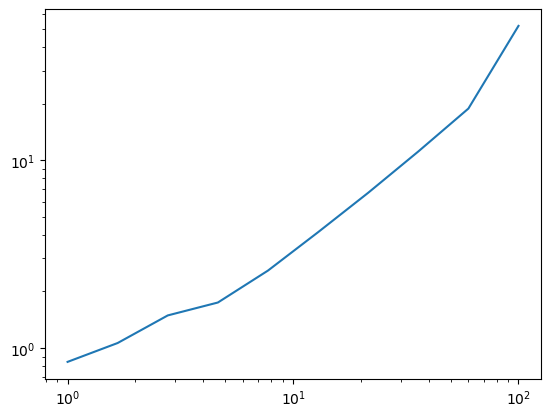

In [13]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau_high.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

f = plt.figure()
plt.plot(tau, S5)
plt.xscale("log")
plt.show()


ff = plt.figure()
plt.plot(tau, (S5-0.25)/(2/27*tau))
plt.xscale("log")
plt.yscale("log")

plt.show()


test 2


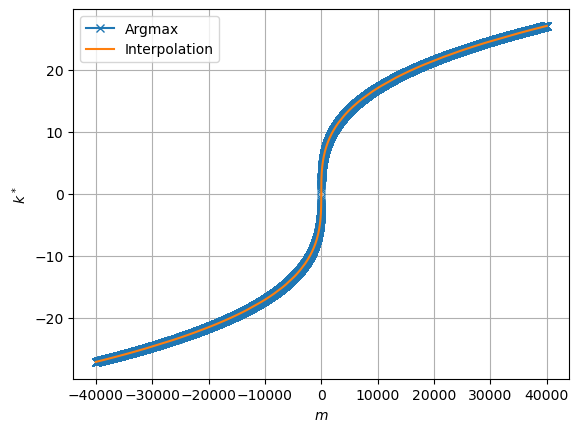

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import UnivariateSpline, interp1d

m = np.linspace(-40000, 40000, 40000)
brr = np.ones_like(m) * (1e-4)


def Leg(m, initial, a, lambda_, D2):
    def dphi(x):
        return np.sinh(x)

    def Eq(k, m, a, lambda_, D2):
        return m - D2 * k - lambda_ * a * dphi(a * k)
    def Eq2(k, m, a, lambda_, D2):
        return  k * m- D2/2 * k**2 - lambda_ * (np.cosh(a*k) - 1)
        
    k = opt.fsolve(Eq, initial, args=(m, a, lambda_, D2), full_output=0, maxfev=500000)

    s = []
    for i in range(len(k)):
        s.append(Eq2(k[i], m[i], a, lambda_, D2))
    
    return k, s

def Leg2(m, initial, a, lambda_, D2):
    def dphi(x):
        return np.sinh(x)

    def Eq(k, m, a, lambda_, D2):
        return m - D2 * k - lambda_ * a * dphi(a * k)
    def Eq2(k, m, a, lambda_, D2):
        return  k * m- D2/2 * k**2 - lambda_ * (np.cosh(a*k) - 1)
        
    k = opt.root(Eq, initial, args=(m, a, lambda_, D2), method="lm").x

    s = []
    for i in range(len(k)):
        s.append(Eq2(k[i], m[i], a, lambda_, D2))
    
    return k, s


def Leg3(m, initial, a, lambda_, D2, b=1/2):
    def dphi(x, b):
        return x + 4 * b * x ** 3

    def Eq(k, m, a, lambda_, D2, b):
        return m - D2 * k - lambda_ * a * dphi(a * k, b)
    def Eq2(k, m, a, lambda_, D2, b):
        return  k * m- D2/2 * k**2 - lambda_ * (1 / 2 * (a*k) ** 2 + b * (a * k) ** 4 )
        
    k = opt.root(Eq, initial, args=(m, a, lambda_, D2, b), method="lm").x

    s = []
    for i in range(len(k)):
        s.append(Eq2(k[i], m[i], a, lambda_, D2, b))
    
    return k, s

def Leg4(m, initial, a, lambda_, D2, b=1/2):
    
    def Eq2(k, m, a, lambda_, D2, b):
        return  k * m- D2/2 * k**2 - lambda_ * (1 / 2 * (a*k) ** 2 + b * (a * k) ** 4 )

    k = np.linspace(-40, 40, 60000)

    K = []
    for M in m:
        e = Eq2(k, M, a, lambda_, D2, b)
        f = np.argmax(e)
        K.append(k[f])
    s = []
    for i in range(len(K)):
        s.append(Eq2(K[i], m[i], a, lambda_, D2, b))
    
    return K, s


# b = Leg2(m, brr, 10.0, 0.01, 1)
# # brr = b[0]

# print("test")
# c = Leg2(m, brr, 1e1, 1e-4, 1)
#crr = c[0]
print("test 2")
# d = Leg3(m, brr, 1e1, 1e-4, 1)
# drr = d[0]
# print("test 4")
e = Leg4(m, brr, 1e1, 1e-4, 1)
err = e[0]

xs = np.linspace(m.min(), m.max(), 10000)

arr_int = interp1d(m, err, kind="linear")


#plt.plot(m, brr, "s", label="Init Legendre")
#plt.plot(m, crr, "s", label="Root Legendre")
# plt.plot(m, drr, "x", label="Numerical Legendre")
plt.plot(m, err, "-x", label="Argmax")


plt.plot(xs, arr_int(xs), label="Interpolation")
plt.legend()
plt.grid()
plt.xlabel(r"$m$")
plt.ylabel(r"$k^*$")
plt.savefig("Legendre_interpolation.pdf", dpi=500)


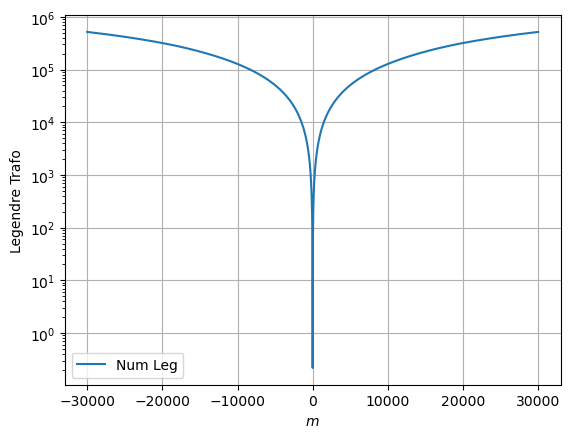

In [3]:
plt.plot(m, e[1], label="Num Leg")
#plt.plot(m, d[1])
plt.legend()
plt.xlabel(r"$m$")
plt.ylabel(r"Legendre Trafo")
plt.grid()
plt.yscale("log")

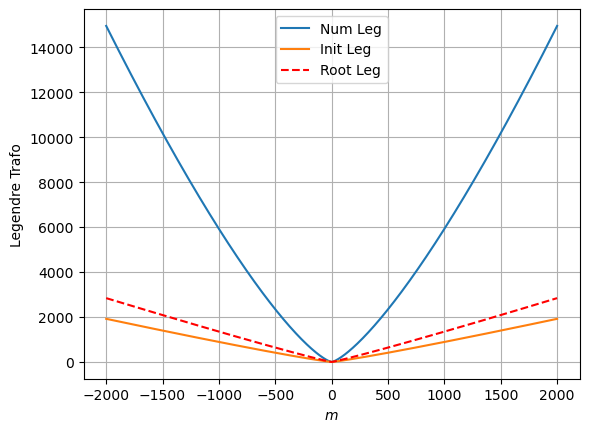

In [17]:
plt.plot(m, d[1], label="Num Leg")
plt.plot(m, b[1], label="Init Leg")
plt.plot(m, c[1], "r--", label="Root Leg")

plt.legend()
plt.xlabel(r"$m$")
plt.ylabel(r"Legendre Trafo")
plt.grid()
#plt.yscale("log")

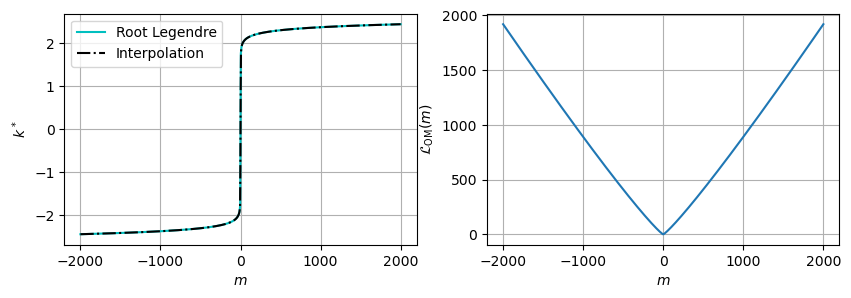

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3),sharex=True)

ax[0].plot(m, crr, "c-", label="Root Legendre")
ax[0].plot(xs, arr_int(xs), "k-.", label="Interpolation")

ax[1].plot(m, b[1])


ax[0].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel(r"$m$")
ax[1].set_xlabel(r"$m$")
ax[0].set_ylabel(r"$k^*$")
ax[1].set_ylabel(r"$\mathcal{L}_\mathrm{OM}(m)$")

plt.savefig("Legendre_transform.pdf", dpi=500, bbox_inches="tight")

[-0.08699458 -0.08689356 -0.08679151 -0.08668841 -0.08658424 -0.08647897
 -0.08637258 -0.08626505 -0.08615634 -0.08604645 -0.08593533 -0.08582296
 -0.08570932 -0.08559437 -0.08547808 -0.08536042 -0.08524137 -0.08512088
 -0.08499892 -0.08487545 -0.08475044 -0.08462385 -0.08449563 -0.08436575
 -0.08423416 -0.08410082 -0.08396567 -0.08382868 -0.08368977 -0.08354892
 -0.08340605 -0.08326111 -0.08311404 -0.08296477 -0.08281324 -0.08265938
 -0.08250312 -0.08234437 -0.08218306 -0.08201911 -0.08185243 -0.08168292
 -0.08151049 -0.08133503 -0.08115644 -0.0809746  -0.08078939 -0.08060069
 -0.08040836 -0.08021226 -0.08001223 -0.07980813 -0.07959976 -0.07938697
 -0.07916955 -0.07894729 -0.07871999 -0.07848739 -0.07824926 -0.07800532
 -0.07775528 -0.07749883 -0.07723562 -0.0769653  -0.07668747 -0.0764017
 -0.07610753 -0.07580443 -0.07549187 -0.07516921 -0.0748358  -0.07449088
 -0.07413365 -0.07376318 -0.07337846 -0.07297834 -0.07256154 -0.07212661
 -0.0716719  -0.07119553 -0.07069532 -0.07016878 -0.

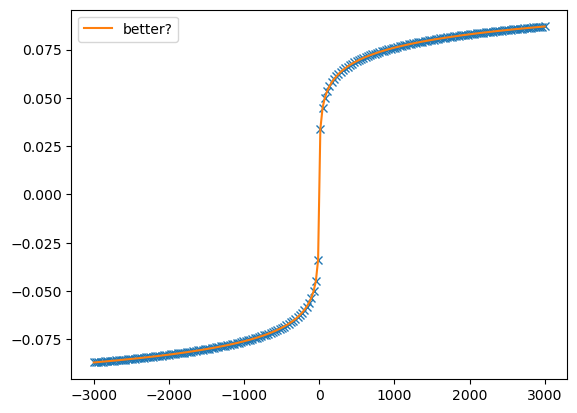

In [45]:
from sympy import cos, nsolve, Symbol
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import UnivariateSpline, interp1d

m = np.linspace(-3000, 3000, 200)
initial = np.ones_like(m) * (-1e-5)


def Leg(m, initial, a, lambda_, D2):
    def dphi(x):
        return np.sinh(x)
    def Eq2(k, m, a, lambda_, D2):
        s = 0
        for i in range(len(m)):
            s+= k[i]*m[i]- D2/2 * k[i]**2 - lambda_ * (np.cosh(a*k[i]) - 1)
        return -s
    def Eq(k, m, a, lambda_, D2):
        return m - D2 * k - lambda_ * a * dphi(a * k)

    sol = opt.minimize(Eq2, initial, args=(m, a, lambda_, D2))    
    
    return sol.x

g = Leg(m, initial, 100, 0.01, 2)
arr = g
print(arr)
#spl = UnivariateSpline(m, arr)
xs = np.linspace(m.min(), m.max(), 1000)
#spl.set_smoothing_factor(0.1)

arr_int = interp1d(m, arr, kind="linear")



plt.plot(m, arr, "x")
#plt.plot(xs, spl(xs), label="worse?")
plt.plot(xs, arr_int(xs), label="better?")
plt.legend()
plt.show()

In [ ]:
k = np.linspace(-10, 10, 100)
plt.plot(k, 0.5 * k**2 - 0.01 * )

In [48]:
from sympy import cos, nsolve, Symbol
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import UnivariateSpline, interp1d

import ctypes as ct

lib = ct.CDLL("lib.so")


OSError: lib.so: cannot open shared object file: No such file or directory

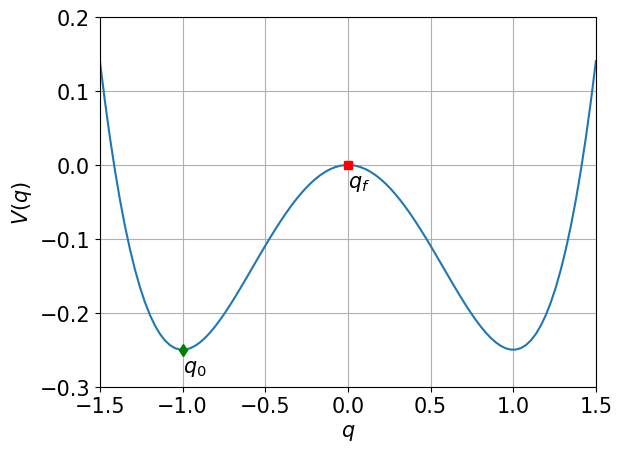

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 15})

q = np.linspace(-1.5, 1.5, 100)
def V(q):
    return q**4 / 4 - q ** 2 / 2

plt.plot(q, V(q))
plt.plot(0, V(0), "rs")
plt.plot(-1, V(-1), "gd")
plt.annotate(r"$q_0$", [-1, V(-1)-0.03], [-1, V(-1)-0.03])
plt.annotate(r"$q_f$", [0, V(0)-0.03], [0, V(0)-0.03])
plt.grid()
plt.axis([-1.5, 1.5, -0.3, 0.2])
plt.xlabel(r"$q$")
plt.ylabel(r"$V(q)$")
plt.savefig("Setup.svg", dpi=500)

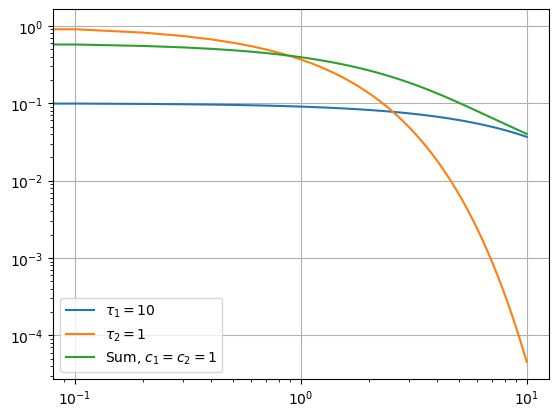

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def C(t, tau):
    return 1 / tau * np.exp(-t / tau)

t = np.linspace(0, 10, 100)

plt.plot(t, C(t, 10), label=r"$\tau_1=10$")
plt.plot(t, C(t, 1), label=r"$\tau_2=1$")
plt.plot(t, C(t, 10)+C(t, 2), label=r"Sum, $c_1=c_2=1$")
plt.legend()
plt.grid()
plt.xscale("log")
plt.yscale("log")

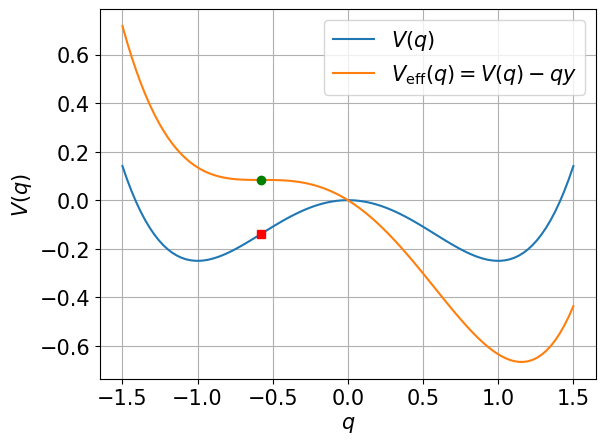

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 15})


q = np.linspace(-1.5, 1.5, 100)
def V(q):
    return q**4 / 4 - q ** 2 / 2

def dV(q):
    return q**3 - q


y = dV(- 1 / np.sqrt(3))

plt.plot(q, V(q), label=r"$V(q)$")
plt.plot(q, V(q) - y * q, label=r"$V_\mathrm{eff}(q) = V(q) - qy$")

plt.plot(-1/np.sqrt(3), V(-1/np.sqrt(3)), "rs")
plt.plot(-1/np.sqrt(3), V(-1/np.sqrt(3)) - y * (-1/np.sqrt(3)), "go")

plt.grid()
plt.legend()
plt.xlabel(r"$q$")
plt.ylabel(r"$V(q)$")

plt.savefig("effective_potential.pdf", dpi=500, bbox_inches="tight")

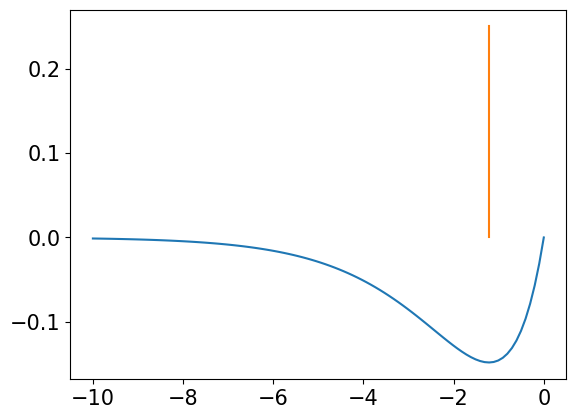

In [8]:
t = 1.5

x = np.linspace(-10, 0, 100)

plt.plot(x, np.exp(x) - np.exp(x/t))
plt.plot(np.ones(2) * (np.log(t) / (1/t - 1)), [0, 0.25])